<a href="https://colab.research.google.com/github/fcoelhomrc/MachineLearning/blob/main/APC_Exercises/set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

1. Sum of two uniformly distributed random variables
   
   As we expect from theory, the result should be distributed as the convolution of their distributions. In this case, the result is a triangle-shaped distributed, ranging from 0 to 2

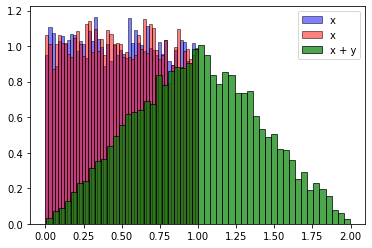

In [4]:
rng = np.random.default_rng()
N = 10000
x = rng.uniform(0, 1, N)
y = rng.uniform(0, 1, N)

plt.hist(x, ec="k", color="b", bins=50, label="x", alpha=0.5, density=True)
plt.hist(y, ec="k", color="r", bins=50, label="x", alpha=0.5, density=True)
plt.hist(x + y, ec="k", color="g", bins=50, label="x + y", alpha=0.7, density=True)
plt.legend()

2. Assume normally distributed variables

$$
X \sim \mathcal{N}(\mu_x, \sigma_x^2) \\
Y \sim \mathcal{N}(\mu_y, \sigma_y^2)
$$

It is really easy to see that, using the given parameters, $f_X(0) = \frac{1}{\sqrt{2\pi}}$ and $f_Y(0) = \frac{1}{\sqrt{2\pi e}}$

In [5]:
print(1/np.sqrt(2*np.pi))
print(1/np.sqrt(2*np.pi*np.e))

0.3989422804014327
0.24197072451914337


Now, we consider a mixture distribution
$$
f_Z(z) = 0.5 f_X(z) + 0.5 f_Y(z)
$$

In [6]:
def mixture(N, alpha=0.5, locs=(0, 1), scales=(1, 1)):
    rng = np.random.default_rng()
    mask = (rng.uniform(size=N) > alpha)
    z = np.zeros(N)
    z[mask] = rng.normal(loc=locs[0], scale=scales[0], size=z[mask].size)
    z[~mask] = rng.normal(loc=locs[1], scale=scales[1], size=z[~mask].size)
    return z

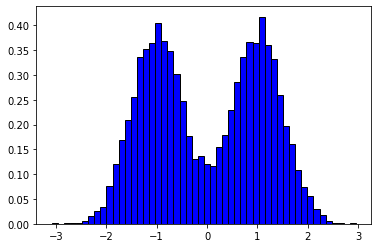

In [7]:
Z = mixture(10000, locs=(-1, 1), scales=(0.5, 0.5))
# Z = mixture(10000)

_ = plt.hist(Z, ec="k", color="b", bins=50, density=True)

How do we calculate the probability if observing $z = 0$?

Refresher on conditional probabilities:

$$
P(A|B) = \frac{P(A\cap B)}{P(B)} \\
P(B|A) = \frac{P(A\cap B)}{P(A)}
$$

Combining both:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

In general, we also haev $P(B) = P(A \cap B) + P(A' \cap B)$, thus:

$$
\overbrace{P(A|B)}^{\text{posterior}} = \frac{P(B|A)P(A)}{P(A \cap B) + P(A' \cap B)} = \frac{P(B|A)\overbrace{P(A)}^{\text{prior}}}{P(B|A)P(A) + P(B|A')P(A')}
$$

which is **Bayes' Theorem**.

Back to our problem:

Define binary variable $W \in \{ 0,1 \}$ where $w=0$ means we sample from $f_X$ and $w=1$, from $f_Y$. In our case, $P(w=0)=P(w=1)=0.5$

$$
P(Z=z|W=0) = f_X(z) \\
P(Z=z|W=1) = f_Y(z)
$$

Given that we observed $z=0$, the probability of having sampled from $f_X$ is simply $P(W=0|Z=0)$. Invoking Bayes' Theorem:

$$
P(W=0|Z=0) = \frac{P(Z=0|W=0)P(W=0)}{P(Z=0|W=0)P(W=0) + P(Z=0|W=1)P(W=1)} = \frac{0.5f_X(0)}{0.5f_X(0) + 0.5f_Y(0)} = \frac{f_X(0)}{f_X(0) + f_Y(0)}
$$




3. Notice that since each distribution have different ranges, the histograms for even weights are such that the area of each mode is the same! This implies the wider $[4, 6]$ distribution having half the height of the narrower $[0, 1]$.



In [8]:
def uniform_mixture(N, alpha=0.5):
    rng = np.random.default_rng()
    mask = (rng.uniform(size=N) > alpha)
    z = np.zeros(N)
    z[mask] = rng.uniform(0, 1, size=z[mask].size)
    z[~mask] = rng.uniform(4, 6, size=z[~mask].size)
    return z

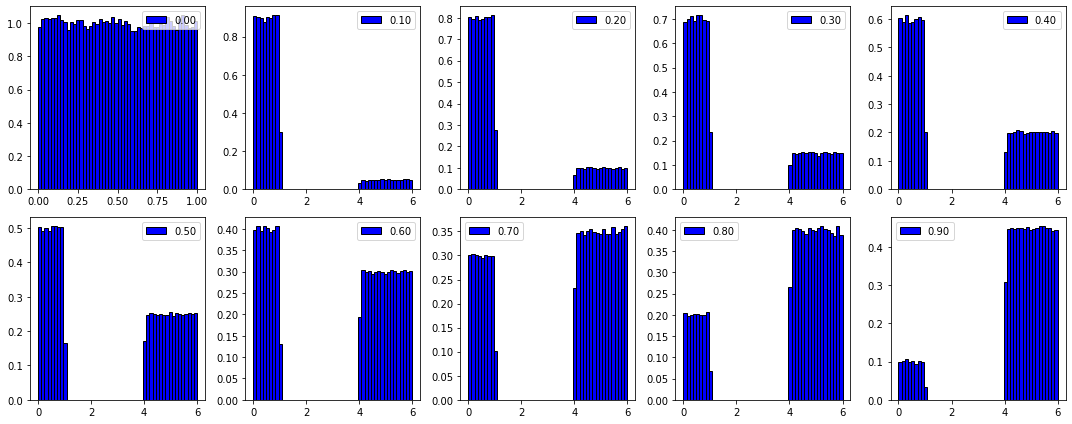

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

N = 100000
alphas = np.linspace(0, 1, 11)
count = 0
for i in range(2):
    for j in range(5):
        alpha = alphas[count]
        Z = uniform_mixture(N, alpha)
        ax[i, j].hist(Z, label=f"{alpha:.2f}", density=True, bins=50, ec="k", color="b") 
        ax[i, j].legend()
        fig.tight_layout()
        count += 1

# 3. Simulating a binomial distribution



In [10]:
def simulate_coin(N_samples, p=0.5):
    rng = np.random.default_rng(seed=42)
    results = np.random.uniform(0, 1, N_samples)
    results = np.where(results < p, 1, 0).astype("int32")
    classes, counts = np.unique(results, return_counts=True)
    return classes, counts

N = 10000
label_, sim_ = simulate_coin(N)

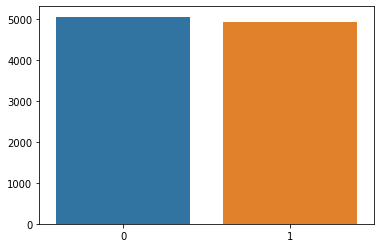

In [11]:
sns.barplot(x=label_, y=sim_)

In [29]:
def simulate_bin_sum(N_samples, sample_size=1000, p=0.5):
    rng = np.random.default_rng(seed=42)
    results = np.random.uniform(0, 1, (N_samples, sample_size))
    results = np.where(results < p, 1, 0).astype("int32")
    Y = np.sum(results, axis=-1)
    Y1, Y2 = Y/sample_size, (Y+1)/(sample_size+2)
    return Y, Y1, Y2

def get_avg_estim(N_sims):
    conv = np.zeros((2, N_sims))
    N_samples = np.logspace(1, 6, N_sims).astype("int32")
    for i in range(N_sims):
        Y, Y1, Y2 = simulate_bin_sum(N_samples[i], sample_size=100, p=0.5)
        conv[0, i] = np.mean(Y1)
        conv[1, i] = np.mean(Y2)
    return N_samples, conv

In [30]:
sim_, estim_1, estim_2 = simulate_bin_sum(N_samples=10000)

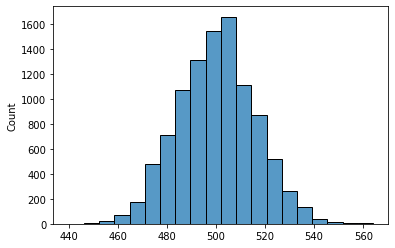

In [24]:
sns.histplot(sim_, bins=20)

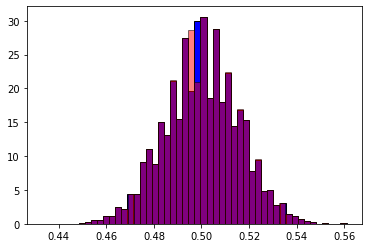

In [43]:
_ = plt.hist(estim_1, bins=50, color="blue", ec="k", density=True)
_ = plt.hist(estim_2, bins=50, color="red", ec="k", density=True, alpha=0.5)



In [37]:
N, estimators = get_avg_estim(50)

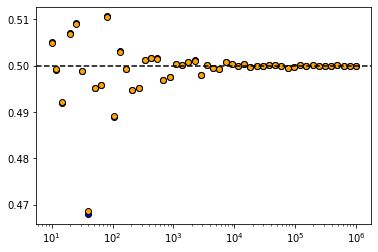

In [38]:
plt.scatter(N, estimators[0], color="blue", ec="k", marker="o")
plt.scatter(N, estimators[1], color="orange", ec="k", marker="o")
plt.axhline(y=0.5, color="k", ls="--")
plt.xscale("log")

Remember what we define as an **unbiased estimator:**

$$
{\displaystyle \operatorname {Bias} ({\hat {\theta }},\theta )=\operatorname {Bias} _{\theta }[\,{\hat {\theta }}\,]=\operatorname {E} _{x\mid \theta }[\,{\hat {\theta }}\,]-\theta =\operatorname {E} _{x\mid \theta }[\,{\hat {\theta }}-\theta \,],}
$$

We can assume our variable $Y$ follows a binomial distribution (as it is the sum of Bernoulli distributed varaibles), and compute the expectation of $\hat{Y}_1$ and $\hat{Y}_2$

$$
\begin{align}
\operatorname{E}[\hat{Y}_1] &= \frac{1}{n}\operatorname{E}[Y] =  \frac{np}{n} = p \\
\operatorname{E}[\hat{Y}_2] &= \frac{1}{n+2}\operatorname{E}[Y+1] =  \frac{np + 1}{n+2} = \frac{(n+2)p - 2p + 1}{n+2} \\
&= p - \frac{2p +1}{n +2}
\end{align}
$$

Thus, $\hat{Y}_1$ is unbiased, while $\hat{Y}_2$ as a bias of $- \frac{2p +1}{n +2}$. Note that in the limit $n \gg 1$, this bias vanishes.

This can be seen at the above graph, since for $n=100$ we can already see that the average value of $\hat{Y}_2$ also converges to the right solution.




In [44]:
def get_mse_estim(N_sims, p=0.5):
    conv = np.zeros((2, N_sims))
    N_samples = np.logspace(1, 6, N_sims).astype("int32")
    for i in range(N_sims):
        # use small sample_size to make bias more expressive
        Y, Y1, Y2 = simulate_bin_sum(N_samples[i], sample_size=10, p=p)
        conv[0, i] = ((p - Y1)**2).mean()
        conv[1, i] = ((p - Y2)**2).mean()
    return N_samples, conv

In [40]:
N, mse = get_mse_estim(50)

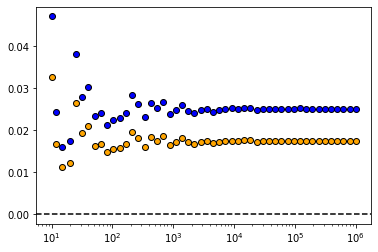

In [42]:
plt.scatter(N, mse[0], color="blue", ec="k", marker="o")
plt.scatter(N, mse[1], color="orange", ec="k", marker="o")
plt.axhline(y=0., color="k", ls="--")
plt.xscale("log")

We have confirmed that the MSE of $\hat{Y}_2$ is less than that of $\hat{Y}_1$!

Indeed, [Wikipedia has a brief discussion on these estimators](https://en.wikipedia.org/wiki/Binomial_distribution#Estimation_of_parameters)

Just for fun, run the simulation again but now with $p \ne 0.5$

In [49]:
N, mse = get_mse_estim(50, p=0.9999)

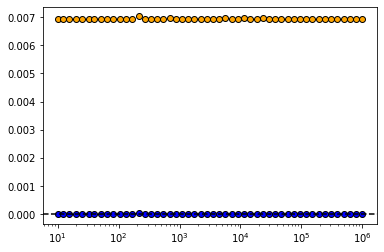

In [50]:
plt.scatter(N, mse[0], color="blue", ec="k", marker="o")
plt.scatter(N, mse[1], color="orange", ec="k", marker="o")
plt.axhline(y=0., color="k", ls="--")
plt.xscale("log")

The bias becomes evident as $p \uparrow$ and we keep $n$ relatively small.